# Introduction

Herein, I will be analysing some data collected throughout the decades in regards to Olympic medals. In addition, I will be doing some data visualization.

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(30,15))
#autoreload
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
#Load the data
data_dict = pd.read_csv('./data/raw/dictionary.csv')
data_summer = pd.read_csv('./data/raw/summer.csv')
data_winter = pd.read_csv('./data/raw/winter.csv')


## Aim of the data analysis

1. We will want to acquire a thorough understanding on how the Olympic medal are distribute by country and sport. 
2. We also want to check the countries' evolution throughout the years 
3. Correlation between GDP and GDP per capita with medals 

### 1. Summer Olympics analysis

Let's have a overall look at the data and its features

In [ ]:
data_summer.head(10)

We can see the data is ordered by year, gender. Let's look at the end of the data to see the sport are alphabetically ordered.

In [ ]:
data_summer.info()

In [ ]:
data_summer.tail(10)

Yes, sport are alphabetically ordered. Therefore, we can get some insights from this previous analysis and knowledge. Let's check if there is any missing data.

In [ ]:
data_summer.tail(10)

In [ ]:
data_summer.info()

Apparently, there are 4 missing data on the country field. We will assign those country as Independent Olympic Athletes (IOA), as many athltes compete under this flag due to political issues between associations.

Let's first check whether we have country registered

In [ ]:
data_summer.loc[data_summer['Country'] == 'IOA']

Seems that there are no data from this country. Given the significant size of data missing compared to the total amount of entries (i.e. 4 vs 31165), we can Insert IOA for those medals.

In [ ]:
data_summer["Country"].fillna("IOA", inplace=True)
sns.heatmap(data_summer.isnull(), cbar=False, cmap='Blues_r')

Great! Now it seems that we do not have any missing data. We can start analysing the data.

Let's have a look at simple trends and data.

#### 1.1. Evolution of number of sports competed over the year

Here we will see how many sports have been introduced over the year.

In [ ]:
plt.figure(figsize=(30,15))
sns.barplot(y=data_summer.groupby('Year')['Sport'].nunique(),x=data_summer['Year'].unique(), data=data_summer, palette='Blues_d')
plt.ylabel('Number of sport', fontsize=15)
plt.xlabel('Olympic years', fontsize=15)
plt.show()

Although there is a variation along the year, it seems that the number of sports included in the Olympic games has increased. Interestingly, the year 1908 and 1920 had surprisingly close number compared to very recent editions. 

####  1.2. Gender evolution

Let's see the women participation compared to men in the medals table. We can do this by calculating the percentage of women's medal compared to total of men's medal.

In [107]:
#Lets subset the data
subset = data_summer[['Year','Gender','Medal']]

# Now we will create two subsets from subset with the total amount of medal per gender
#Getting the total for Men
subset_male = subset.loc[subset1['Gender'] == 'Men'].groupby('Year').count().rename(columns={'Gender': 'Men'})
subset_male = subset_male.drop('Medal', axis=1).reset_index()


#Getting the total for women
subset_women = subset.loc[subset1['Gender'] == 'Women'].groupby('Year').count().rename(columns={'Gender': 'Women'})
subset_women = subset_women.drop('Medal', axis=1).reset_index()

#As we can see from here, the number of women's medals in 1896 was 0
#So we will add this value to the top of the subset
subset_women = subset_women.append({'Year': 1896, 'Women': 0}, ignore_index=True)
subset_women = subset_women.sort_values(by='Year', ascending=True).reset_index(drop=True)

#Now we merge both subset by the column "Year"
sb_final = pd.merge(subset_male,subset_women,on='Year')
# sb_final = sb_final.T
sb_final

,Year,Men,Women
0,1896,151,0
1,1900,501,11
2,1904,458,12
3,1908,789,15
4,1912,855,30
5,1920,1255,43
6,1924,833,51
7,1928,615,95
8,1932,555,60
9,1936,791,84


In [108]:
#Calculate the percentage of women medals and add to the subset
sb_final['Ratio'] = sb_final["Women"]/(sb_final['Women']+sb_final['Men'])
sb_final

,Year,Men,Women,Ratio
0,1896,151,0,0.000000
1,1900,501,11,0.021484
2,1904,458,12,0.025532
3,1908,789,15,0.018657
4,1912,855,30,0.033898
5,1920,1255,43,0.033128
6,1924,833,51,0.057692
7,1928,615,95,0.133803
8,1932,555,60,0.097561
9,1936,791,84,0.096000


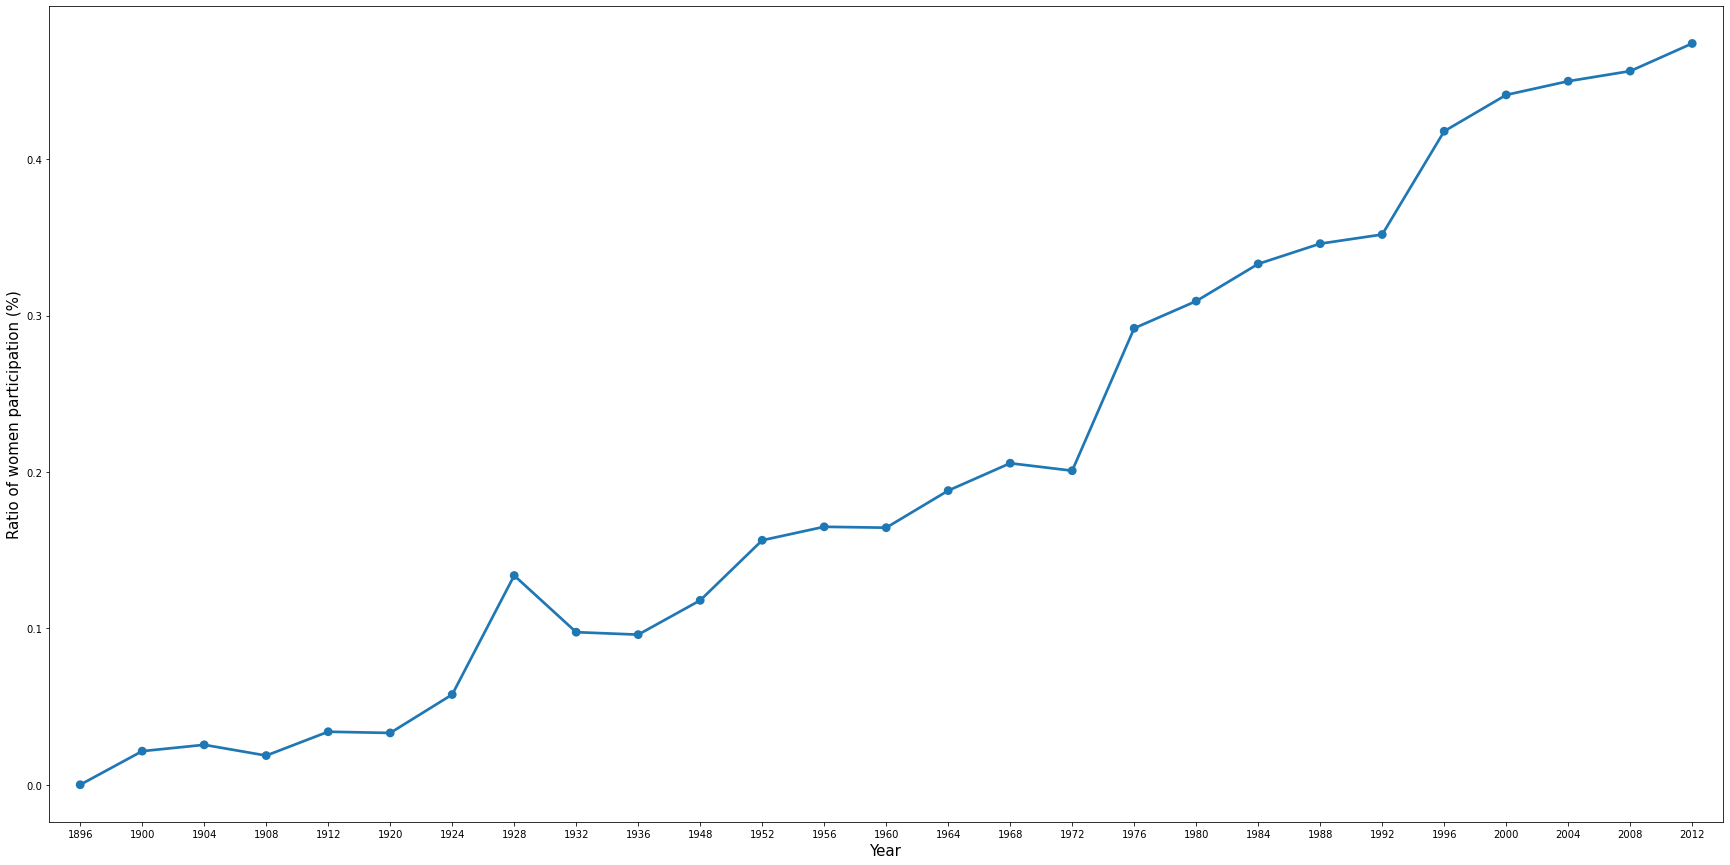

In [109]:
plt.figure(figsize=(30,15))
ax = sns.pointplot(x=sb_final['Year'], y=sb_final['Ratio'], data=sb_final)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Ratio of women participation (%)', fontsize=15)
plt.show()

The first modern olympic games there were no women's competition. However, it is good to see that the gender ratio of participation is almost 50/50 nowadays.

#### 1.3. Geographic Analysis

Herein, we will be doing some geographic analysis and correlation with GDP

In [ ]:
data_summer['Medal'].head(10)